## As the Castro paper is only using the DC and classical monocytes from our atlas, making a UMAP of just these cells. 

In [3]:
#load packages I need
import os
import tools
import scanpy as sc
import pandas as pd
import dandelion as ddl
from tqdm import tqdm
import matplotlib.pyplot as plt
import scanpy.external as sce
from matplotlib.pyplot import rc_context
import seaborn as sns

In [4]:
#set current directory 
os.chdir('/scratch/user/s4436039/scdata/Python_Integration_Sep')
os.getcwd()

'/scratch/user/s4436039/scdata/Python_Integration_Sep'

In [5]:
# read in data
data = sc.read_h5ad('NRclean_clustered2.h5ad')

In [6]:
data

AnnData object with n_obs × n_vars = 498023 × 1268
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'cancer_type_broad', 'clean-leiden_0.8', 'clean-subcluster', 'clean-subcluster-v2', 'YS_sig', 'HSC_sig', 'CD5nDC2_up_vDC3', 'DC3_up_vCD5nDC2', 'CD5pDC2_up_vDC3', 'DC3_up_vCD5pDC2', 'DC3_up_vMono', 'Mono_up_vDC3', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'DC_Axl_sig', 'DC2_up_DC3', 'DC3_up_DC2', 'mregDC_sig', 'cDC1_mregDC', 'cDC2_mregDC', 'NR_annotati

In [7]:
data.obs["NR_annotations_simple"].value_counts()

NR_annotations_simple
Tissue resident macrophage           368421
Classical monocytes                   57086
non-classical monocytes               29255
cDC2                                  17391
KI-67+ Tissue resident macrophage     13020
cDC1                                   6730
mregDC                                 6120
Name: count, dtype: int64

In [8]:
# subset out the DC and classical monocytes
data_DCM = data[data.obs["NR_annotations_simple"].isin(["cDC1","cDC2","mregDC","Classical monocytes"])]

In [9]:
data_DCM.obs["NR_annotations_simple"].value_counts()

NR_annotations_simple
Classical monocytes    57086
cDC2                   17391
cDC1                    6730
mregDC                  6120
Name: count, dtype: int64

In [10]:
data_DCM

View of AnnData object with n_obs × n_vars = 87327 × 1268
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'keep_or_remove', 'leiden', 'celltype', 'leiden_DC', 'leiden_DC_v2', 'exclude_annots', 'leiden_M', 'Technology', 'cancer_type_broad', 'clean-leiden_0.8', 'clean-subcluster', 'clean-subcluster-v2', 'YS_sig', 'HSC_sig', 'CD5nDC2_up_vDC3', 'DC3_up_vCD5nDC2', 'CD5pDC2_up_vDC3', 'DC3_up_vCD5pDC2', 'DC3_up_vMono', 'Mono_up_vDC3', 'DC1_sig', 'DC2_sig', 'DC3_sig', 'DC_Axl_sig', 'DC2_up_DC3', 'DC3_up_DC2', 'mregDC_sig', 'cDC1_mregDC', 'cDC2_mregDC', 'NR_a

### Repeat neighbours and UMAP on subset

In [11]:
## Computing neighbourhood graph 
sc.pp.neighbors(data_DCM, n_neighbors=10, n_pcs=60)

In [12]:
sc.tl.umap(data_DCM, min_dist=0.3)  

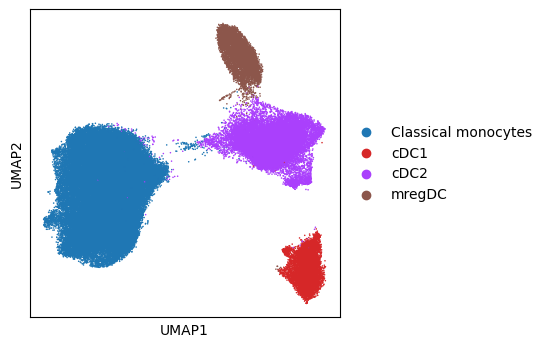

In [14]:
#plotting 
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data_DCM, color=["NR_annotations_simple"], ncols=1, size=5, title="")

# Repeat with scvi object:

In [15]:
#show current directory 
os.chdir('/scratch/user/s4436039/scdata/Myeloid_Objects')
os.getcwd()

'/scratch/user/s4436039/scdata/Myeloid_Objects'

In [16]:
data_scvi = sc.read_h5ad('/scratch/user/s4436039/scdata/Myeloid_Objects/NRclean_scVI_Data.h5ad')

In [17]:
data_scvi

AnnData object with n_obs × n_vars = 498023 × 1264
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_type', 'cancer_type', 'patient_id', 'sample_id', 'percent.mt', 'site', 'sample_type_major', 'cancer_subtype', 'integration_id', 'ident', 'dataset_id', 'Technology', 'NR_annotations_simple', 'sample_type_major2', 'cancer_with_H', 'cancer_broadest', 'patient_treatment', '_scvi_batch', '_scvi_labels'
    var: 'name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'integration_id_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [18]:
# subset out the DC and classical monocytes
data_DCM_scvi = data_scvi[data_scvi.obs["NR_annotations_simple"].isin(["cDC1","cDC2","mregDC","Classical monocytes"])]

In [19]:
data_DCM_scvi.obs["NR_annotations_simple"].value_counts()

NR_annotations_simple
Classical monocytes    57086
cDC2                   17391
cDC1                    6730
mregDC                  6120
Name: count, dtype: int64

In [21]:
#check how many PCs in scvi object:
data_DCM_scvi.obsm["X_pca"].shape

(87327, 50)

In [22]:
## Computing neighbourhood graph 
sc.pp.neighbors(data_DCM_scvi, n_neighbors=10, n_pcs=50)

In [23]:
sc.tl.umap(data_DCM_scvi, min_dist=0.3)  

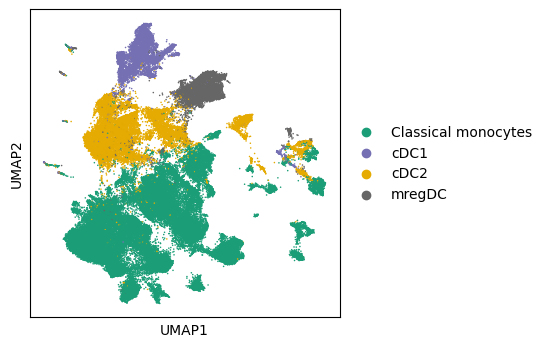

In [31]:
#plotting 
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data_DCM_scvi, color=["NR_annotations_simple"], ncols=1, size=5, title="", palette="Dark2")